In [2]:
#import necessary libraries
import pandas as pd
import matplotlib as plt

In [3]:
#importing the csv files
customer = pd.read_csv("customer_churn.csv")
sales = pd.read_csv("sales_data.csv")

In [4]:
customer.head()

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


In [5]:
sales.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


**Data Cleaning**

In [27]:
#checking for null values
customer.isnull().sum()

Customer_ID         0
Tenure              0
MonthlyCharges      0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
SeniorCitizen       0
Churn               0
Customer_Key        0
dtype: int64

In [23]:
sales.isnull().sum()

Date            0
Product         0
Quantity        0
Price           0
Customer_ID     0
Region          0
Total_Sales     0
Customer_Key    0
dtype: int64

In [24]:
#checking the data types
customer.dtypes

Customer_ID         object
Tenure               int64
MonthlyCharges       int64
TotalCharges         int64
Contract            object
PaymentMethod       object
PaperlessBilling    object
SeniorCitizen        int64
Churn                int64
Customer_Key         int32
dtype: object

In [25]:
sales.dtypes

Date            object
Product         object
Quantity         int64
Price            int64
Customer_ID     object
Region          object
Total_Sales      int64
Customer_Key     int32
dtype: object

In [30]:
#converting the date column's data type to datetime format
sales['Date'] = pd.to_datetime(sales['Date'])
sales.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Customer_Key
0,2024-01-01,Phone,7,37300,CUST001,East,261100,1
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2
2,2024-01-03,Phone,2,21746,CUST003,West,43492,3
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,4
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,5


In [17]:
#renaming the column names for merging 
customer.rename(columns = {'CustomerID' : 'Customer_ID'}, inplace = "true") 
customer.head()

,Customer_ID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


In [18]:
#standardising the Customer_ID column with Customer_Key
sales['Customer_Key'] = sales['Customer_ID'].str.extract(r'(\d+)').astype(int)
customer['Customer_Key'] = customer['Customer_ID'].str.extract(r'(\d+)').astype(int)

In [34]:
#merging the data sets for analysis
customer_sales = pd.merge(
    sales,
    customer,
    on="Customer_Key",
    how="inner"
)

In [35]:
customer_sales.head()

,Date,Product,Quantity,Price,Customer_ID_x,Region,Total_Sales,Customer_Key,Customer_ID_y,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,2024-01-01,Phone,7,37300,CUST001,East,261100,1,C00001,6,64,1540,One year,Credit Card,No,1,0
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,2024-01-03,Phone,2,21746,CUST003,West,43492,3,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,4,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,5,C00005,16,185,1023,One year,Electronic Check,No,1,0


**Performing Exploratory Analysis**

***What is the total revenue?***

In [146]:
total_revenue = customer_sales['Total_Sales'].sum()
total_revenue

12365048

***How many customers we have?***

In [147]:
total_customers = customer_sales["Customer_Key"].count()
total_customers

100

***Who are our most valuable customers?***

In [132]:
#identify top 5 customers
top_customers =  customer_sales.groupby("Customer_Key")["Total_Sales"].max().sort_values(ascending=False).reset_index()
top_customers_count = top_customers.head(5)
top_customers_count

,Customer_Key,Total_Sales
0,16,373932
1,7,363870
2,83,350888
3,73,349510
4,20,333992


Customer ID-16 has made the highest sales accounting to 3,73,932, followed by Customer ID-7 with 3,63,870

***What products sell best together?***

In [119]:
#products that sold best together
product_pairs = (
    customer_sales.groupby('Customer_Key')['Product']
      .apply(list)
)
from itertools import combinations
from collections import Counter

pair_counter = Counter()

for products in product_pairs:
    unique_products = set(products)  # avoid duplicates
    pair_counter.update(combinations(sorted(unique_products), 2))

top_product_pairs = pair_counter.most_common(10)
top_product_pairs

[]

This shows us that no products were sold together, meaning each customer bought only one product

***Which regions have highest sales?***

In [57]:
#top region with the highest sales
top_region = customer_sales.groupby("Region")["Total_Sales"].max().sort_values(ascending=False).reset_index()
top_region.head(1)

,Region,Total_Sales
0,South,373932


South region has made the highest sales overall

***What are the top products that were sold?***

In [138]:
#top sold products
top_products = customer_sales.groupby("Product").agg({"Quantity": "sum","Total_Sales": "sum"}).sort_values(by="Total_Sales", ascending=False)
top_products

,Quantity,Total_Sales
Product,,
Laptop,136,3889210
Tablet,127,2884340
Phone,101,2859394
Headphones,48,1384033
Monitor,66,1348071


Laptop was the highest sold product with 136 quantities and sales upto 38,89,210  followed by Tablet with 127 quantities and sales upto 28,84,340 

***What are the seasonal trends?***

In [94]:
#monthly sales analysis
customer_sales['Month'] = customer_sales['Date'].dt.month_name()
customer_sales['Month_num'] = pd.to_datetime(customer_sales['Month'], format='%B').dt.month
monthly_sales = (
    customer_sales.groupby('Month')['Total_Sales']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)
monthly_sales.head()

,Month,Total_Sales
0,March,4485006
1,January,4120524
2,February,2656050
3,April,1103468


March being the highest sold month with total sales of 44,85,006, meaning this indicates that the high in sales could be due to nearing of exam time for students

In [78]:
#pivot table to summarize total sales on products based on region
pivot_table = pd.pivot_table(
    customer_sales,
    values="Total_Sales",
    index="Region",
    columns="Product",
    aggfunc="sum"
)
pivot_table

Product,Headphones,Laptop,Monitor,Phone,Tablet
Region,,,,,
East,288361,221946,642870,506828,859634
North,107091,1798206,397100,489284,1191954
South,512168,1373120,39924,1471428,341212
West,476413,495938,268177,391854,491540


In [107]:
#retention rate
repeat_customers = customer_sales["Churn"].value_counts()
retention_rate = (repeat_customers[repeat_customers > 1].count() / repeat_customers.count()) * 100
retention_rate

100.0

In [85]:
#customer churn rate
total_churned = customer_sales['Churn'].sum()
total_churned

10

In [87]:
#churn based on contract type
churn_by_contract = (
    customer_sales.groupby('Contract')['Churn']
      .mean()
      .sort_values(ascending=False)
)
churn_by_contract

Contract
Month-to-month    0.171429
Two year          0.103448
One year          0.027778
Name: Churn, dtype: float64

In [111]:
#churn by tenure
churn_by_tenure = (
    customer_sales.groupby('Tenure')['Churn']
      .mean()
      .sort_values(ascending=False)
)
churn_by_tenure.head()

Tenure
2     1.000000
4     1.000000
9     1.000000
10    1.000000
7     0.666667
Name: Churn, dtype: float64

In [145]:
churn_by_tenure.tail()

Tenure
32    0.0
34    0.0
35    0.0
3     0.0
71    0.0
Name: Churn, dtype: float64

***How can we improve customer retention?***

From the churn rate analysis by tenure and contract, we could see that tenures of fewer months easily leave the service. So, promoting new offers to make customers extend their tenure to longer months of duration could help us reduce the churn rate.

Also, providing better offers to make customers convert from month-to-month to one year contract could help increase retention 

**Visualisations**

***Creating visuals to stand with the above analysis***

In [104]:
#monthly sales trend analysis using line chart
monthly_sales_trend = (
    customer_sales.groupby(['Month_num','Month'])['Total_Sales'].sum()
)
monthly_sales_trend

Month_num  Month   
1          January     4120524
2          February    2656050
3          March       4485006
4          April       1103468
Name: Total_Sales, dtype: int64

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month_num,Month'>

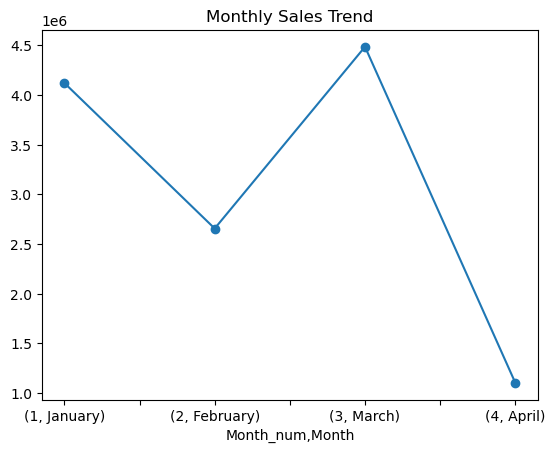

In [105]:
monthly_sales_trend.plot(
    x='Month',
    y='Total_Sales',
    kind='line',
    marker='o',
    title='Monthly Sales Trend'
)


***Which month has the highest sales?***
As mentioned above, March being the highest sold month with total sales of 44,85,006, meaning this indicates that the high in sales could be due to nearing of exam time for students

<Axes: title={'center': ' Regional Sales'}, xlabel='Region'>

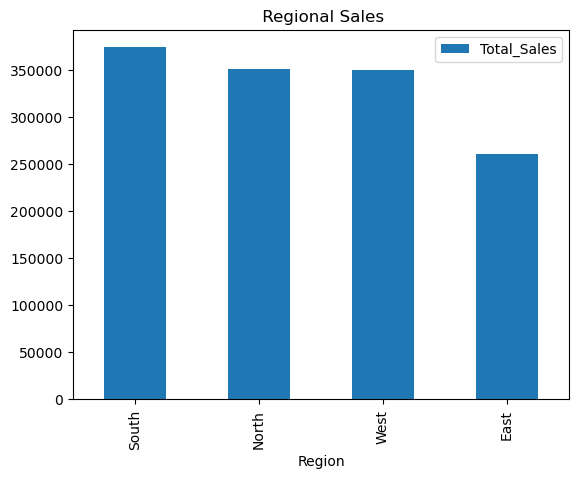

In [120]:
#Sales based on region
top_region.plot(
    x='Region',
    y='Total_Sales',
    kind='bar',
    title=' Regional Sales'
)

***Which region has the highest sales?*** South has made the highest sales

<Axes: title={'center': 'top customers'}, ylabel='Customer_Key'>

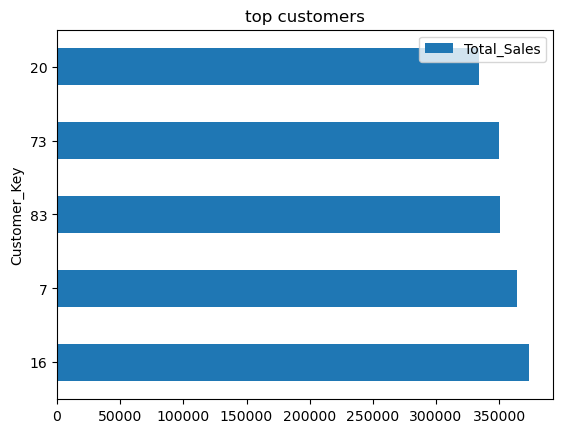

In [133]:
top_customers_count.plot(
    x='Customer_Key',
    y='Total_Sales',
    kind='barh',
    title='top customers'
)

***Who are are valuable customers?*** Customer ID 16, 7, 83, 73, 20 are at the top spending around 3,33,000-3,39,000

<Axes: title={'center': 'Top Sold Products'}, ylabel='Total_Sales'>

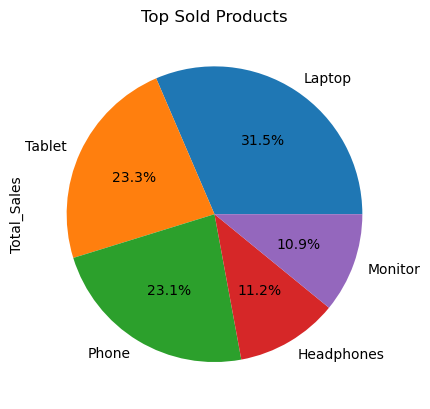

In [143]:
#sales based on Products
top_products.plot(
    y="Total_Sales",
    labels=top_products.index,
    kind='pie',
    autopct='%1.1f%%',  
    title='Top Sold Products',
    legend=False          
)

***What are the top products?*** Laptop was the top sold followed by tablet and phone